In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Let's run calibration...

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from LeCheapEyeTracker import Client, Server

In [3]:
fps = 30
T = 7.

calib = Client(et=Server(), timeline=np.linspace(0, T, T*fps), downscale=2)
calib.app.run()
calib.et.close()

window size :  (2560, 1440)
target dynamic :
 [(0.5, 0.018069982528686523), (0.5, 0.26977109909057617), (0.5, 0.3737940788269043), (0.5, 0.4789421558380127), (0.5, 0.5838170051574707), (0.5, 0.687791109085083), (0.5, 0.7931351661682129), (0.5, 0.8969230651855469), (0.5, 1.000615119934082), (0.5, 1.1057310104370117), (0.5, 1.2092320919036865), (0.5, 1.314643144607544), (0.5, 1.4203541278839111), (0.5, 1.5251250267028809), (0.5, 1.6294450759887695), (0.5, 1.7344920635223389), (0.5, 1.8380470275878906), (0.5, 1.9434809684753418), (0.33, 2.0488600730895996), (0.33, 2.1534531116485596), (0.33, 2.2574551105499268), (0.33, 2.3609001636505127), (0.33, 2.465175151824951), (0.33, 2.569789171218872), (0.33, 2.674255132675171), (0.33, 2.779132127761841), (0.33, 2.884366989135742), (0.33, 2.9887900352478027), (0.5, 3.093796968460083), (0.5, 3.197895050048828), (0.5, 3.3018620014190674), (0.5, 3.4066050052642822), (0.5, 3.5105249881744385), (0.5, 3.6151859760284424), (0.5, 3.720837116241455), (0.5, 

/usr/local/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)


In [4]:
stim_x = np.array([])
eye_x = np.array([])

for stim in calib.stims_X_t:
    x, stash = stim
    stim_x = np.append(stim_x, x)
    
for eye in calib.et.eye_x_t:
    y, stash = eye
    eye_x = np.append(eye_x, y)

print (len(stim_x)==len(eye_x))

True


## ...and plot eye and targets x_positions 

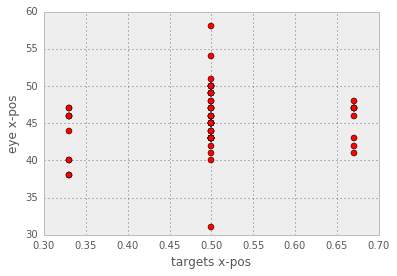

In [5]:
plt.plot(stim_x, eye_x, 'ro')
plt.xlabel('targets x-pos')
plt.ylabel('eye x-pos')
plt.show()

## We must get the mean of eye position for each stimulus position

In [11]:
i = 0
center = np.array([])
left = np.array([])
right = np.array([])

while i <= len(stim_x) - 1 :
    value = stim_x[i]
    if value == 0.33 :
        left = np.append(left, eye_x[i])
    elif value == 0.5 :
        center = np.append(center, eye_x[i])
    else :
        right = np.append(right, eye_x[i])
    i += 1

c_mean = np.mean(center)
l_mean = np.mean(left)
r_mean = np.mean(right)
        

In [12]:
print (l_mean)

43.2


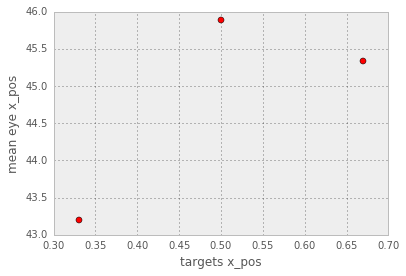

In [13]:
plt.plot([0.33, 0.5, 0.67], [l_mean, c_mean, r_mean], 'ro')
plt.xlabel('targets x_pos')
plt.ylabel('mean eye x_pos')
plt.show()

In [ ]:
! git commit -am 'Checking the coordinates system of eye location in OpenCV '

In [ ]:
! git status

In [ ]:
! git push